# Algoritmo de Detecção de fraudes em transações de cartão de crédito

# Problema de Negócio
####  É importante que as empresas de cartão de crédito sejam capazes de reconhecer transações fraudulentas com cartão de crédito para que os clientes não sejam cobrados por itens que não compraram.

####   O conjunto de dados contém transações feitas por cartões de crédito em setembro de 2013 por titulares de cartões europeus.

####  Este conjunto de dados apresenta transações que ocorreram em dois dias, onde temos 492 fraudes em 284.807 mil transações. O conjunto de dados é altamente desequilibrado, a classe positiva (fraudes) responde por 0,172% de todas as transações.

#### Ele contém apenas variáveis de entrada numéricas que são o resultado de uma transformação PCA. Infelizmente, devido a questões de confidencialidade, não podemos fornecer os recursos originais e mais informações básicas sobre os dados. Características V1, V2, … V28 são os principais componentes obtidos com PCA, as únicas características que não foram transformadas com PCA são 'Tempo' e 'Valor'. 

####  O recurso 'Tempo' contém os segundos decorridos entre cada transação e a primeira transação no conjunto de dados. O recurso 'Valor' é o Valor da transação, esse recurso pode ser usado para aprendizado sensível ao custo dependente de exemplo. O recurso 'Class' é a variável de resposta e assume valor 1 em caso de fraude e 0 caso contrário.

#### Para fins de promover a ciência, o conjunto de dados utilizado está dispoível em https://www.kaggle.com/mlg-ulb/creditcardfraud

# Objetivos deste projeto

#### Propor um modelo de detecção de fraude que apresente um erro de classificação de no máximo 20%, isto é, vamos propor um modelo com métricas igual ou superior a 80% de acerto.  

In [1]:
# Bibliotecas utilizadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score, recall_score, confusion_matrix, matthews_corrcoef, f1_score
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [2]:
# Conjunto de dados de creditcard 
dataset = pd.read_csv('creditcard.csv.zip',compression='zip')

In [3]:
# Verificando as primeiras cinco linhas
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Análise Exploratória dos dados

In [4]:
# Verificando as informações dos objetos das colunas 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
#Checar se temos valores NA nas colunas do dataset
dataset.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### Nota-se acima que não há nenhuma covariavel que apresenta valores nulos no conjunto de dados.

In [6]:
#Estatísticas descritivas das colunas do dataset
dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


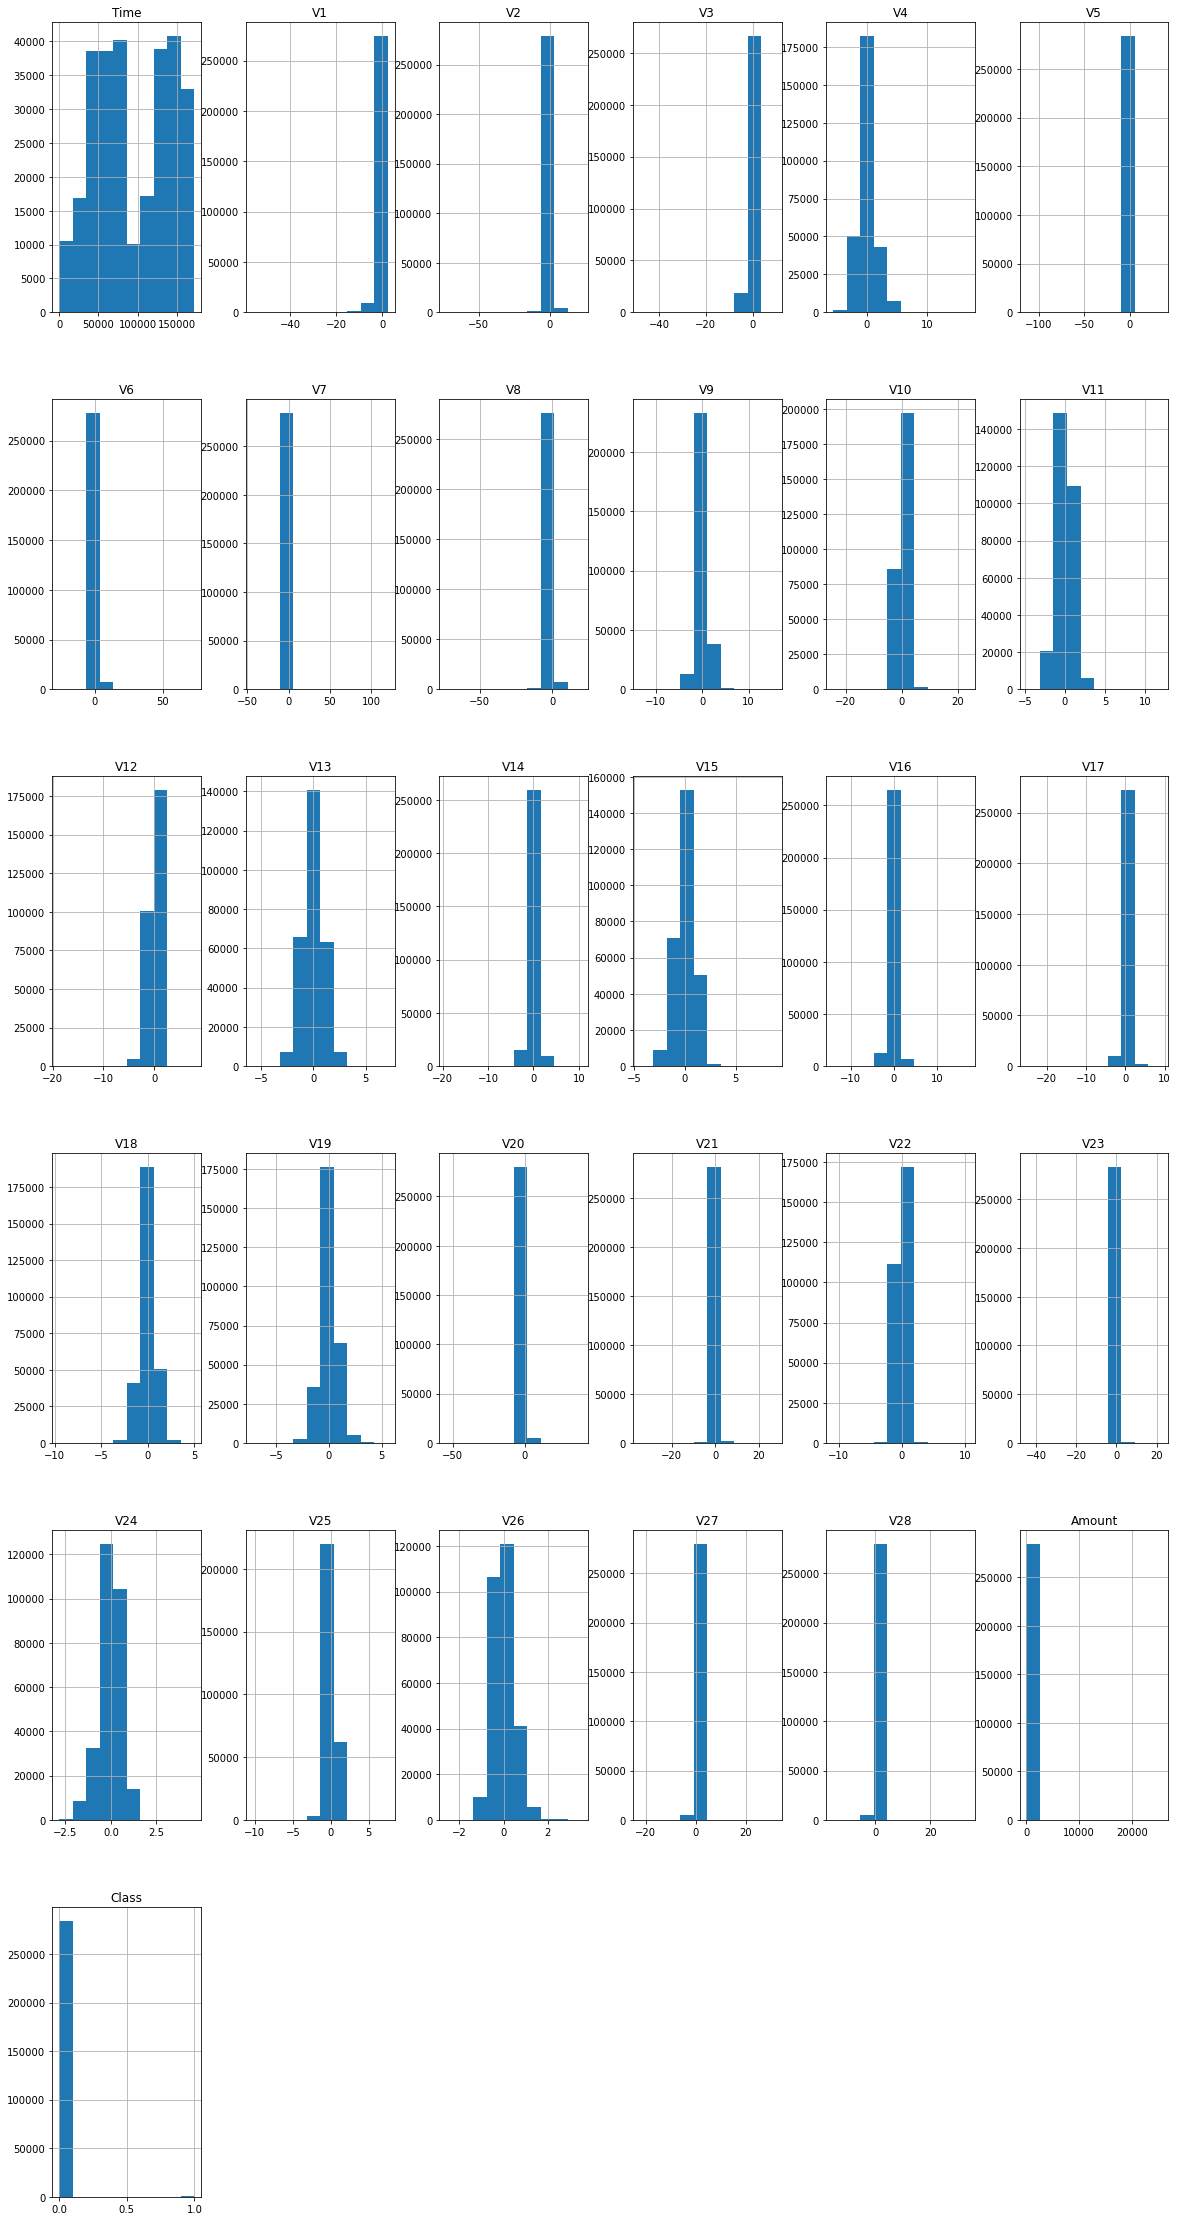

In [7]:
# Vamos utilizar o gráfico de histograma para verificar o comportamento dos dados
dataset.hist(figsize = (20,40))
plt.show()

### Apesar de não termos a real situação das variáveis acima (dado que as mesmas são componentes principais gerados do conjunto de dados original), temos que o comportamento dos dados possuem poucas variações e a priori não mostram nenhuma presença de valores discrepantes.

<AxesSubplot:xlabel='Class', ylabel='count'>

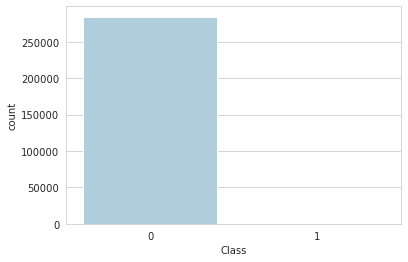

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Class',data=dataset,palette='RdBu_r')

### O gráfico de barras acima, reporta que os dados estão desbalanceados, isto é, é necessário que um  tratamento especial seja dado antes da utilização de modelos de Machine Learning.

In [9]:
# Vamos analisar o número de transações, quantas são e não são consideradas fraudes, considerando as informações passadas no conjunto de dados
# Número de todos os casos registrados

cases = len(dataset)
# Número de fraudes registradas
fraud_count = len(dataset[dataset.Class == 1])
# Número de não fraudes registradas
nonfraud_count = len(dataset[dataset.Class == 0])
# Percentual de casos fraudulentos
fraud_percentage = round((fraud_count/cases)*100, ndigits = 2)

print("Total de casos registrados: ", cases)
print("Total de casos de fraudes registrados: ", fraud_count)
print("Total de casos de não fraudes registrados: ", nonfraud_count)
print("Percentual de casos de fraudes registrados: ", fraud_percentage, "%")

Total de casos registrados:  284807
Total de casos de fraudes registrados:  492
Total de casos de não fraudes registrados:  284315
Percentual de casos de fraudes registrados:  0.17 %


### Em geral, o número de transações fraudelentas em conjunto de dados de bancos são desbalanceados, ou seja, apresentam mais transações sem fraude. No entanto, é importante que o banco busque maneiras reduzir cada vez mais esse crime cibernétigo, pois, causa atraso em um parcela de clientes no caso em questão, tmos que apenas 492 transações no total de 284807 apresetaram fraude, logo a busca por modelos que identifique a priori e reporte ao usuário e ao banco essa ação criminosa tornam os serviços do banco mais atrativos para conectar novas clientes.

In [10]:
# Vamos verificar estatísticas relacionadas ao valores que é são registrados para transações gerais, transações fraudulentas e não fraudulentas

# all amounts
print("Volores total das transações: ", dataset.Amount.describe())

# empty row
print()

# Fraud-amounts: analyze Amount where class == 1
fraud_cases = dataset[dataset.Class == 1].Amount
print("Valores de Fraude: ", fraud_cases.describe())

# empty row
print()

# Non-Fraud-amounts: analyze Amount where class == 0
nonfraud_cases =  dataset[dataset.Class == 0].Amount
print("Valores de não fraude: ", nonfraud_cases.describe())

# empty row
print()

# median of fraud cases (just to have it later as variable)
median_fraud_amount = dataset[dataset.Class == 1].Amount.median()


# Total de dinheiro envolvido em casos de fraude
fraud_money = sum(fraud_cases)
print("Total de dinheiro envolvido nos casos de fraude: ", round(fraud_money, 2))

Volores total das transações:  count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

Valores de Fraude:  count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Valores de não fraude:  count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

Total de dinheiro envolvido nos casos de fraude:  60127.97


### Com relação aos valores movimentados nans transações, pode-se notar que em média transações fraudulentas movimentam mais valores, isto é, pode acarretar danos catastróficos para os clientes. Além disso, o valor total envolvido nessa fraudes foi de 60127.97. Dessa forma, o objetivo deste projeto é apresentar um modelo utilizando inteligência artificial para detectar previamente se uma transação é ou não fraudulenta.  

In [11]:
# Vamos verificar estatísticas relacionadas ao tempos gasto em transações gerais,
# transações fraudulentas e não fraudulentas

# Considerando o tempo de todas as transações
print("Tempo do total das transações: ", dataset.Time.describe())

# empty row
print()

# Considerando o tempo gasto em transações fraudulentas
fraud_cases = dataset[dataset.Class == 1].Time
print("Tempo de Fraude: ", fraud_cases.describe())

# empty row
print()

# Considerando o tempo gasto em transações não fraudulentas
nonfraud_cases =  dataset[dataset.Class == 0].Time
print("Tempo de não fraude: ", nonfraud_cases.describe())

# empty row
print()


# Total de tempo dos casos de fraude
fraud_time = sum(fraud_cases)
print("Total de tempo nos casos de fraude: ", round(fraud_time, 2))


Tempo do total das transações:  count    284807.000000
mean      94813.859575
std       47488.145955
min           0.000000
25%       54201.500000
50%       84692.000000
75%      139320.500000
max      172792.000000
Name: Time, dtype: float64

Tempo de Fraude:  count       492.000000
mean      80746.806911
std       47835.365138
min         406.000000
25%       41241.500000
50%       75568.500000
75%      128483.000000
max      170348.000000
Name: Time, dtype: float64

Tempo de não fraude:  count    284315.000000
mean      94838.202258
std       47484.015786
min           0.000000
25%       54230.000000
50%       84711.000000
75%      139333.000000
max      172792.000000
Name: Time, dtype: float64

Total de tempo nos casos de fraude:  39727429.0


### O tempo gasto em transações fraudulentas em média é menor do que as transações não fraudulentas, isto é esperado, pois quando o crime é cometido o infrator deseja realizar o crime de maneira rápida.

# Pré- Processamento dos dados 

In [12]:
# Undersampling, ou seja, reduzindo o conjunto de dados da classe majoritária para a classe minoritária
X = dataset.loc[:, dataset.columns != 'Class'].to_numpy()
y = dataset.loc[:, dataset.columns == 'Class'].to_numpy()

undersample = RandomUnderSampler(sampling_strategy='majority', random_state = 42)
X_resampled, y_resampled = undersample.fit_resample(X, y)

data = pd.DataFrame(X_resampled, columns= [col for col in dataset.columns if col != "Class"])
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,82450.0,1.314539,0.590643,-0.666593,0.716564,0.301978,-1.125467,0.388881,-0.288390,-0.132137,...,-0.058040,-0.170307,-0.429655,-0.141341,-0.200195,0.639491,0.399476,-0.034321,0.031692,0.76
1,50554.0,-0.798672,1.185093,0.904547,0.694584,0.219041,-0.319295,0.495236,0.139269,-0.760214,...,-0.081298,0.202287,0.578699,-0.092245,0.013723,-0.246466,-0.380057,-0.396030,-0.112901,4.18
2,55125.0,-0.391128,-0.245540,1.122074,-1.308725,-0.639891,0.008678,-0.701304,-0.027315,-2.628854,...,0.065716,-0.133485,0.117403,-0.191748,-0.488642,-0.309774,0.008100,0.163716,0.239582,15.00
3,116572.0,-0.060302,1.065093,-0.987421,-0.029567,0.176376,-1.348539,0.775644,0.134843,-0.149734,...,-0.169706,0.355576,0.907570,-0.018454,-0.126269,-0.339923,-0.150285,-0.023634,0.042330,57.00
4,90434.0,1.848433,0.373364,0.269272,3.866438,0.088062,0.970447,-0.721945,0.235983,0.683491,...,-0.282777,0.103563,0.620954,0.197077,0.692392,-0.206530,-0.021328,-0.019823,-0.042682,0.00


### Para tratar do desbalanço da classe de fraude e não fraude, foi-se utilizado a técnica de undersampling

In [13]:
Counter(y_resampled)

Counter({0: 492, 1: 492})

## Feature Selection

In [14]:
# Uilizando o SelectKBest para extrair as melhores features considerando o teste Anova

# Extração de feature 
test = SelectKBest(score_func=f_classif, k=10)
fit = test.fit(X_resampled, y_resampled)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(data.columns)
# Filtrando as duas colunas relacionadas a Spec e Score
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #nomeando as colunas do dataframe
print(featureScores.nlargest(30,'Score'))  #print 30 melhores features

     Specs        Score
14     V14  1256.650733
4       V4  1013.175714
11     V11   868.392856
12     V12   854.121564
10     V10   640.591039
16     V16   546.054125
3       V3   458.969917
9       V9   447.693077
17     V17   446.717840
2       V2   313.462018
7       V7   290.393676
18     V18   270.697699
1       V1   243.965961
6       V6   175.365411
5       V5   168.020887
19     V19    75.872284
20     V20    28.880467
0     Time    22.333644
21     V21    15.513391
29  Amount     8.836073
28     V28     8.748696
24     V24     7.073215
26     V26     7.057291
27     V27     6.299811
13     V13     6.036638
15     V15     3.272942
8       V8     3.224301
23     V23     0.519702
22     V22     0.217742
25     V25     0.151371


In [15]:
# Valores de Score de features maiores que 9 serão considerados no conjunto de dados
features = featureScores.nlargest(30,'Score')
features = features[features['Score']>9]
feat_selec = features['Specs']
feat_selec

14     V14
4       V4
11     V11
12     V12
10     V10
16     V16
3       V3
9       V9
17     V17
2       V2
7       V7
18     V18
1       V1
6       V6
5       V5
19     V19
20     V20
0     Time
21     V21
Name: Specs, dtype: object

In [16]:
# Selecionando apenas as variáveis que apresentaram valores de score maiores que 9.
datasetNew = data[feat_selec]
datasetNew

,V14,V4,V11,V12,V10,V16,V3,V9,V17,V2,V7,V18,V1,V6,V5,V19,V20,Time,V21
0,-1.054631,0.716564,-0.325347,-0.216435,-0.597739,0.601226,-0.666593,-0.132137,0.631117,0.590643,0.388881,0.295078,1.314539,-1.125467,0.301978,-0.136151,-0.058040,82450.0,-0.170307
1,0.573006,0.694584,0.821998,0.468322,0.170547,-0.011633,0.904547,-0.760214,-0.504570,1.185093,0.495236,0.722750,-0.798672,-0.319295,0.219041,0.861541,-0.081298,50554.0,0.202287
2,-0.338340,-1.308725,0.575866,-0.594037,2.051312,-0.756390,1.122074,-2.628854,0.535141,-0.245540,-0.701304,1.016704,-0.391128,0.008678,-0.639891,2.133828,0.065716,55125.0,-0.133485
3,-0.436671,-0.029567,-0.841133,-0.586472,-1.238598,0.266437,-0.987421,-0.149734,0.703234,1.065093,0.775644,0.916719,-0.060302,-1.348539,0.176376,-0.189967,-0.169706,116572.0,0.355576
4,1.323225,3.866438,1.297531,-1.920966,1.166335,1.317655,0.269272,0.683491,-0.441076,0.373364,-0.721945,0.804104,1.848433,0.970447,0.088062,-1.658339,-0.282777,90434.0,0.103563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,-6.665177,1.749293,2.115795,-5.417424,-5.587794,-2.897825,-4.518331,-2.064945,-4.570529,1.125653,-0.882850,-1.315147,-1.927883,-2.010494,-1.566487,0.391167,1.252967,169142.0,0.778584
980,-5.210141,1.411850,2.858466,-3.096915,-3.232153,-2.155297,-5.004247,-1.127396,-3.267116,1.289381,-1.413170,-0.688505,1.378559,-1.326536,0.442581,0.737657,0.226138,169347.0,0.370612
981,-4.057162,0.468308,1.794969,-2.775022,-3.463891,-1.603015,-2.213700,-0.652250,-5.035326,1.126366,-2.234739,-0.507000,-0.676143,-0.003346,-1.120541,0.266272,0.247968,169351.0,0.751826
982,-6.416628,1.817092,1.933520,-5.030465,-5.245984,-2.549498,-5.399730,-1.632333,-4.614717,0.585864,-2.208002,-1.478138,-3.113832,-2.943548,-0.840618,-0.035480,0.306271,169966.0,0.583276


In [17]:
# Undersampling, ou seja, reduzindo o conjunto de dados da classe majoritária para a classe minoritária
X = datasetNew.to_numpy()
y = dataset.loc[:, dataset.columns == 'Class'].to_numpy()

In [18]:
Counter(y_resampled)

Counter({0: 492, 1: 492})

### Foi-se utilizado uma técnica de seleção das variáveis que irão compor o modelo de ML, utilizando a ténica seleção univariada utilizando o teste Anova.

# Modelos de Machine Learning

In [19]:
# Dividindo o conjunto de dados em treino 80% e teste 20%
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled,
                                                    train_size=0.8, random_state=42)

In [20]:
# Padronização das variáveis explicativas do modelo para evitar problemas de escala
from sklearn.preprocessing import StandardScaler
sc_X = MinMaxScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

## Regressão logísticia (LR)

In [21]:
logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_train,y_train.ravel())

LogisticRegression(max_iter=1000)

In [22]:
predictions = logmodel.predict(X_test)

In [23]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92        99
           1       0.99      0.84      0.91        98

    accuracy                           0.91       197
   macro avg       0.92      0.91      0.91       197
weighted avg       0.92      0.91      0.91       197



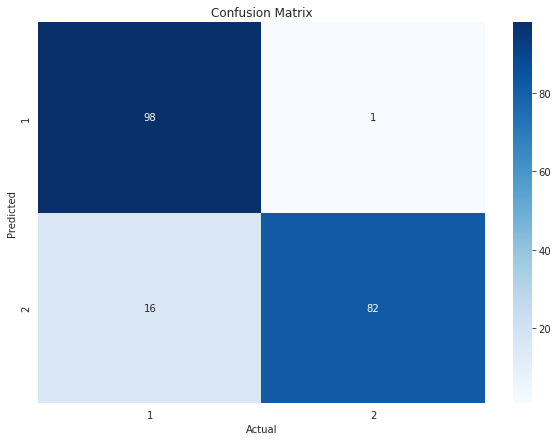

In [24]:
conf_matrix = confusion_matrix(y_test,predictions)

def plot_confusion_matrix(conf_matrix):
  labels = ['True', 'prediction']
  df_cm = pd.DataFrame(conf_matrix, index=['1','2'], columns=['1','2'])
  plt.figure(figsize = (10,7))
  sns.heatmap(df_cm, annot=True, fmt='g', cmap="Blues")
  plt.xlabel('Actual')
  plt.ylabel('Predicted')
  plt.title("Confusion Matrix")

  # plt.savefig()

plot_confusion_matrix(conf_matrix)

In [25]:
# Avaliação das métricas
print('LR Accuracy:',accuracy_score(y_test,predictions))
print('LR recall: ', recall_score(y_test,predictions))
print('LR F1 score: ', f1_score(y_test,predictions))
print('LR matthews corrcoef: ', matthews_corrcoef(y_test,predictions))

LR Accuracy: 0.9137055837563451
LR recall:  0.8367346938775511
LR F1 score:  0.9060773480662982
LR matthews corrcoef:  0.8370516586018008


## Árvore de Decisão (AD)

In [26]:
DecisionTree = DecisionTreeClassifier()
DecisionTree.fit(X_train, y_train)

DecisionTreeClassifier()

In [27]:
predictions_Tree = DecisionTree.predict(X_test)

In [28]:
print(classification_report(y_test,predictions_Tree))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90        99
           1       0.91      0.87      0.89        98

    accuracy                           0.89       197
   macro avg       0.89      0.89      0.89       197
weighted avg       0.89      0.89      0.89       197



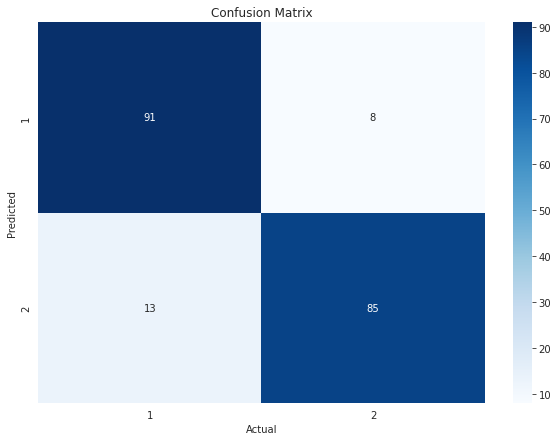

In [29]:
conf_matrix_tree = confusion_matrix(y_test,predictions_Tree)

def plot_confusion_matrix(conf_matrix_tree):
  labels = ['True', 'prediction']
  df_cm = pd.DataFrame(conf_matrix_tree, index=['1','2'], columns=['1','2'])
  plt.figure(figsize = (10,7))
  sns.heatmap(df_cm, annot=True, fmt='g', cmap="Blues")
  plt.xlabel('Actual')
  plt.ylabel('Predicted')
  plt.title("Confusion Matrix")

  # plt.savefig()

plot_confusion_matrix(conf_matrix_tree)

In [30]:
# Avaliação das métricas
print('AD Accuracy:',accuracy_score(y_test,predictions_Tree))
print('AD recall: ', recall_score(y_test,predictions_Tree))
print('AD F1 score: ', f1_score(y_test,predictions_Tree))
print('AD matthews corrcoef: ', matthews_corrcoef(y_test,predictions_Tree))

AD Accuracy: 0.8934010152284264
AD recall:  0.8673469387755102
AD F1 score:  0.8900523560209423
AD matthews corrcoef:  0.7877577318707523


## Randon Forest (RF)

In [31]:
Randonmod = RandomForestClassifier()
Randonmod.fit(X_train, y_train.ravel())

RandomForestClassifier()

In [32]:
predictions_rd = Randonmod.predict(X_test)

In [33]:
print(classification_report(y_test,predictions_rd))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92        99
           1       0.96      0.88      0.91        98

    accuracy                           0.92       197
   macro avg       0.92      0.92      0.92       197
weighted avg       0.92      0.92      0.92       197



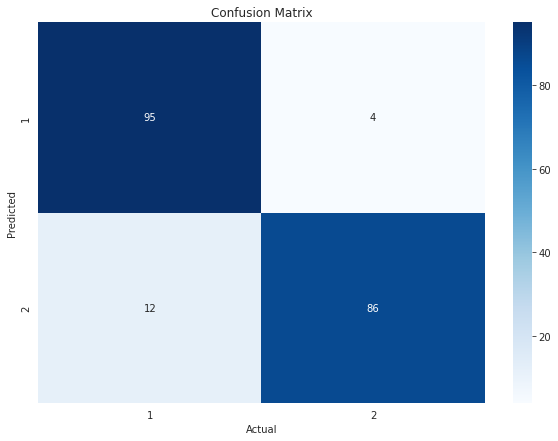

In [34]:
conf_matrix_rd = confusion_matrix(y_test,predictions_rd)

def plot_confusion_matrix(conf_matrix_rd):
  labels = ['True', 'prediction']
  df_cm = pd.DataFrame(conf_matrix_rd, index=['1','2'], columns=['1','2'])
  plt.figure(figsize = (10,7))
  sns.heatmap(df_cm, annot=True, fmt='g', cmap="Blues")
  plt.xlabel('Actual')
  plt.ylabel('Predicted')
  plt.title("Confusion Matrix")

  # plt.savefig()

plot_confusion_matrix(conf_matrix_rd)

In [35]:
# Avaliação das métricas
print('RF Accuracy:',accuracy_score(y_test,predictions_rd))
print('RF recall: ', recall_score(y_test,predictions_rd))
print('RF F1 score: ', f1_score(y_test,predictions_rd))
print('RF matthews corrcoef: ', matthews_corrcoef(y_test,predictions_rd))

RF Accuracy: 0.9187817258883249
RF recall:  0.8775510204081632
RF F1 score:  0.9148936170212767
RF matthews corrcoef:  0.840270673617859


## GradientBoosting (GBoosting)

In [36]:
gradmod = GradientBoostingClassifier()
gradmod.fit(X_train, y_train.ravel())

GradientBoostingClassifier()

In [37]:
predictions_grad= gradmod.predict(X_test)

In [38]:
print(classification_report(y_test,predictions_grad))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        99
           1       0.96      0.89      0.92        98

    accuracy                           0.92       197
   macro avg       0.93      0.92      0.92       197
weighted avg       0.93      0.92      0.92       197



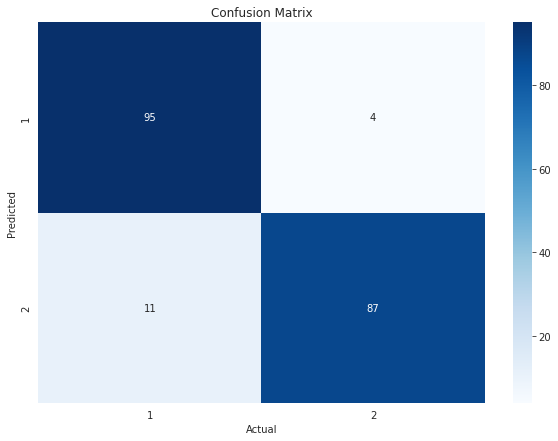

In [39]:
conf_matrix_grad = confusion_matrix(y_test,predictions_grad)
def plot_confusion_matrix(conf_matrix_grad):
  labels = ['True', 'prediction']
  df_cm = pd.DataFrame(conf_matrix_grad, index=['1','2'], columns=['1','2'])
  plt.figure(figsize = (10,7))
  sns.heatmap(df_cm, annot=True, fmt='g', cmap="Blues")
  plt.xlabel('Actual')
  plt.ylabel('Predicted')
  plt.title("Confusion Matrix")

  # plt.savefig()

plot_confusion_matrix(conf_matrix_grad)

In [40]:
# Avaliação das métricas
print('GBoosting Accuracy:',accuracy_score(y_test,predictions_grad))
print('GBoosting recall: ', recall_score(y_test,predictions_grad))
print('GBoosting F1 score: ', f1_score(y_test,predictions_grad))
print('GBoosting matthews corrcoef: ', matthews_corrcoef(y_test,predictions_grad))

GBoosting Accuracy: 0.9238578680203046
GBoosting recall:  0.8877551020408163
GBoosting F1 score:  0.9206349206349207
GBoosting matthews corrcoef:  0.849807156821831


# Avaliação das Métricas para os modelos de LR, AD, RF, GBoosting

In [41]:
# Avaliação da Acurácia dos modelos 
print('LR Accuracy:',accuracy_score(y_test,predictions))
print('AD Accuracy:',accuracy_score(y_test,predictions_Tree))
print('RF Accuracy:',accuracy_score(y_test,predictions_rd))
print('GBoosting Accuracy:',accuracy_score(y_test,predictions_grad))

LR Accuracy: 0.9137055837563451
AD Accuracy: 0.8934010152284264
RF Accuracy: 0.9187817258883249
GBoosting Accuracy: 0.9238578680203046


In [43]:
# Avaliação da recall dos modelos 
print('LR recall_score:',accuracy_score(y_test,predictions))
print('AD recall_score:',recall_score(y_test,predictions_Tree))
print('RF recall_score:',recall_score(y_test,predictions_rd))
print('GBoosting recall_score:',recall_score(y_test,predictions_grad))

LR recall_score: 0.9137055837563451
AD recall_score: 0.8673469387755102
RF recall_score: 0.8775510204081632
GBoosting recall_score: 0.8877551020408163


In [44]:
# Avaliação da F1 score dos modelos 
print('LR F1 score:',f1_score(y_test,predictions))
print('AD F1 score:',f1_score(y_test,predictions_Tree))
print('RF F1 score:',f1_score(y_test,predictions_rd))
print('GBoosting F1 score:',f1_score(y_test,predictions_grad))

LR F1 score: 0.9060773480662982
AD F1 score: 0.8900523560209423
RF F1 score: 0.9148936170212767
GBoosting F1 score: 0.9206349206349207


In [45]:
# Avaliação da F1 score dos modelos 
print('LR matthews corrcoef:',matthews_corrcoef(y_test,predictions))
print('AD matthews corrcoef:',matthews_corrcoef(y_test,predictions_Tree))
print('RF matthews corrcoef:',matthews_corrcoef(y_test,predictions_rd))
print('GBoosting matthews corrcoef:',matthews_corrcoef(y_test,predictions_grad))

LR matthews corrcoef: 0.8370516586018008
AD matthews corrcoef: 0.7877577318707523
RF matthews corrcoef: 0.840270673617859
GBoosting matthews corrcoef: 0.849807156821831


### Em relação as métricas adotadas pelos modelos de classificação o modelo de GBoosting tem os maiores valores em 3 métricas, apenas no recall que o modelo de Regressão logística possui valor maior. No entanto, com base nos resultados apresentados até aqui, o modelo GBoosting foi o adotado para ser utilizado em produção.

# Considerações finais 

### Para o conjunto de dados apresentado neste projeto  as técnicas de redução de dimensionalidade via PCA já haviam sido utitlizadas para redução das colunas do conjunto de dados, por essa razão, o processo de limpeza e preparação dos dados foi mais rápida do que ocorre em projetos envolvendo dados reais de empresas.

### Foram apresentados 4 modelos de Machine Learning: Regressão logística, Árvore de Decisão, Random Forest, e Gradient Boosting. 

### Para o decorer das análises foi considerado as técnicas de seleção de variáveis via SelectKBest (Seleção univariaida) utilizando os testes anova para decidir quais variáveis iriam compor o modelo.

### Como tratam-se de um conjunto de dados em que a classe de fraude e não fraude é desbalanceada, foi-se utilizado a técnica de undersampling.

### Os modelos de Machine Learning apresentaram valores de métricas (Acurácia, Recall, F1 Score, Matthews corrcoef) maiores do que foi definido inicialmente neste projeto. Entretanto, o modelo escolhido para produção será o modelo Gradiente Boosting.

### É importante destacar que o Tunning dos parâmetros do modelo escolhido para a produção poderia ser efetuado. No entanto, como a acurácia ultrapassou o limete definido previamente não foi nencessário realizar essa técnica. 

### Com este modelo pode-se prever a priori quais transações são fraudentas e quais não são. Estes resultados são importantes para o banco, pois, reduzem as reclamações dos clientes e torna o banco cada vez mais conhecido por obter resultados satisfatórios para seus clientes, e além disso reduz os danos financeiros aos seus clientes.